In [1]:
# import libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Source Data Information 

Data set is from kaggle and this is the dictionary:

| Updated Header           | Source Header                        | Data Type | Description                                                                    |
|--------------------------|--------------------------------------|-----------|--------------------------------------------------------------------------------|
| FL_DATE                  | FlightDate                           | object    | Flight Date (yyyymmdd)                                                         |
| AIRLINE_CODE             | Reporting_Airline                    | object    | Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. |
| DOT_CODE                 | DOT_ID_Reporting_Airline             | int64     | An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. |
| FL_NUMBER                | Flight_Number_Reporting_Airline      | int64     | Flight Number                                                                  |
| ORIGIN                   | Origin                               | object    | Origin Airport                                                                 |
| ORIGIN_CITY              | OriginCityName                       | object    | Origin Airport, City Name                                                      |
| DEST                     | Dest                                 | object    | Destination Airport                                                            |
| DEST_CITY                | DestCityName                         | object    | Destination Airport, City Name                                                  |
| CRS_DEP_TIME             | CRSDepTime                           | int64     | CRS Departure Time (local time: hhmm)                                           |
| DEP_TIME                 | DepTime                              | float64   | Actual Departure Time (local time: hhmm)                                        |
| DEP_DELAY                | DepDelay                             | float64   | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers. |
| TAXI_OUT                 | TaxiOut                              | float64   | Taxi Out Time, in Minutes                                                      |
| WHEELS_OFF               | WheelsOff                            | float64   | Wheels Off Time (local time: hhmm)                                              |
| WHEELS_ON                | WheelsOn                             | float64   | Wheels On Time (local time: hhmm)                                               |
| TAXI_IN                  | TaxiIn                               | float64   | Taxi In Time, in Minutes                                                        |
| CRS_ARR_TIME             | CRSArrTime                           | int64     | CRS Arrival Time (local time: hhmm)                                             |
| ARR_TIME                 | ArrTime                              | float64   | Actual Arrival Time (local time: hhmm)                                          |
| ARR_DELAY                | ArrDelay                             | float64   | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers. |
| CANCELLED                | Cancelled                            | float64   | Cancelled Flight Indicator (1=Yes)                                              |
| CANCELLATION_CODE        | CancellationCode                     | object    | Specifies The Reason For Cancellation                                           |
| DIVERTED                 | Diverted                             | float64   | Diverted Flight Indicator (1=Yes)                                               |
| CRS_ELAPSED_TIME         | CRSElapsedTime                       | float64   | CRS Elapsed Time of Flight, in Minutes                                          |
| ELAPSED_TIME             | ActualElapsedTime                    | float64   | Elapsed Time of Flight, in Minutes                                              |
| AIR_TIME                 | AirTime                              | float64   | Flight Time, in Minutes                                                         |
| DISTANCE                 | Distance                             | float64   | Distance between airports (miles)                                               |
| DELAY_DUE_CARRIER        | CarrierDelay                         | float64   | Carrier Delay, in Minutes                                                       |
| DELAY_DUE_WEATHER        | WeatherDelay                         | float64   | Weather Delay, in Minutes                                                       |
| DELAY_DUE_NAS            | NASDelay                             | float64   | National Air System Delay, in Minutes                                           |
| DELAY_DUE_SECURITY       | SecurityDelay                        | float64   | Security Delay, in Minutes                                                      |
| DELAY_DUE_LATE_AIRCRAFT  | LateAircraftDelay                    | float64   | Late Aircraft Delay, in Minutes                                                 |


# Step 1: Data Preprocessing

In [2]:
df = pd.read_csv('flights_sample_3m.csv', header=0)

In [3]:
#ensure the data has been imported correctly
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#inspect data for any outliers or missing values 
df.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,...,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,...,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,...,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


In [5]:
#check for number of null values in data
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

Apply transformations to existing dataframe: datatype change & adding columns. This will structure the data to be injested by a model.

In [6]:
# Convert 'FL_DATE' column to datetime format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Split 'FL_DATE' column into year, month, and day columns
df['Year'] = df['FL_DATE'].dt.year
df['Month'] = df['FL_DATE'].dt.month
df['Day'] = df['FL_DATE'].dt.day

#add delayed column
df["delayed"] = df['ARR_DELAY'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 36 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE                  object        
 2   AIRLINE_DOT              object        
 3   AIRLINE_CODE             object        
 4   DOT_CODE                 int64         
 5   FL_NUMBER                int64         
 6   ORIGIN                   object        
 7   ORIGIN_CITY              object        
 8   DEST                     object        
 9   DEST_CITY                object        
 10  CRS_DEP_TIME             int64         
 11  DEP_TIME                 float64       
 12  DEP_DELAY                float64       
 13  TAXI_OUT                 float64       
 14  WHEELS_OFF               float64       
 15  WHEELS_ON                float64       
 16  TAXI_IN                  float64       
 17  CRS_ARR_TIME             in

### Multivariate Analysis

This serves to highlight any linkages of the dependent variables to the independent variable. 

In [8]:
#sns.pairplot(df[['DEP_DELAY', 'TAXI_OUT', 'ARR_DELAY', 'CRS_ELAPSED_TIME']])
#plt.show()     


In [9]:
#test1_df = df.loc[:, ['FL_DATE', 'AIRLINE_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE']]


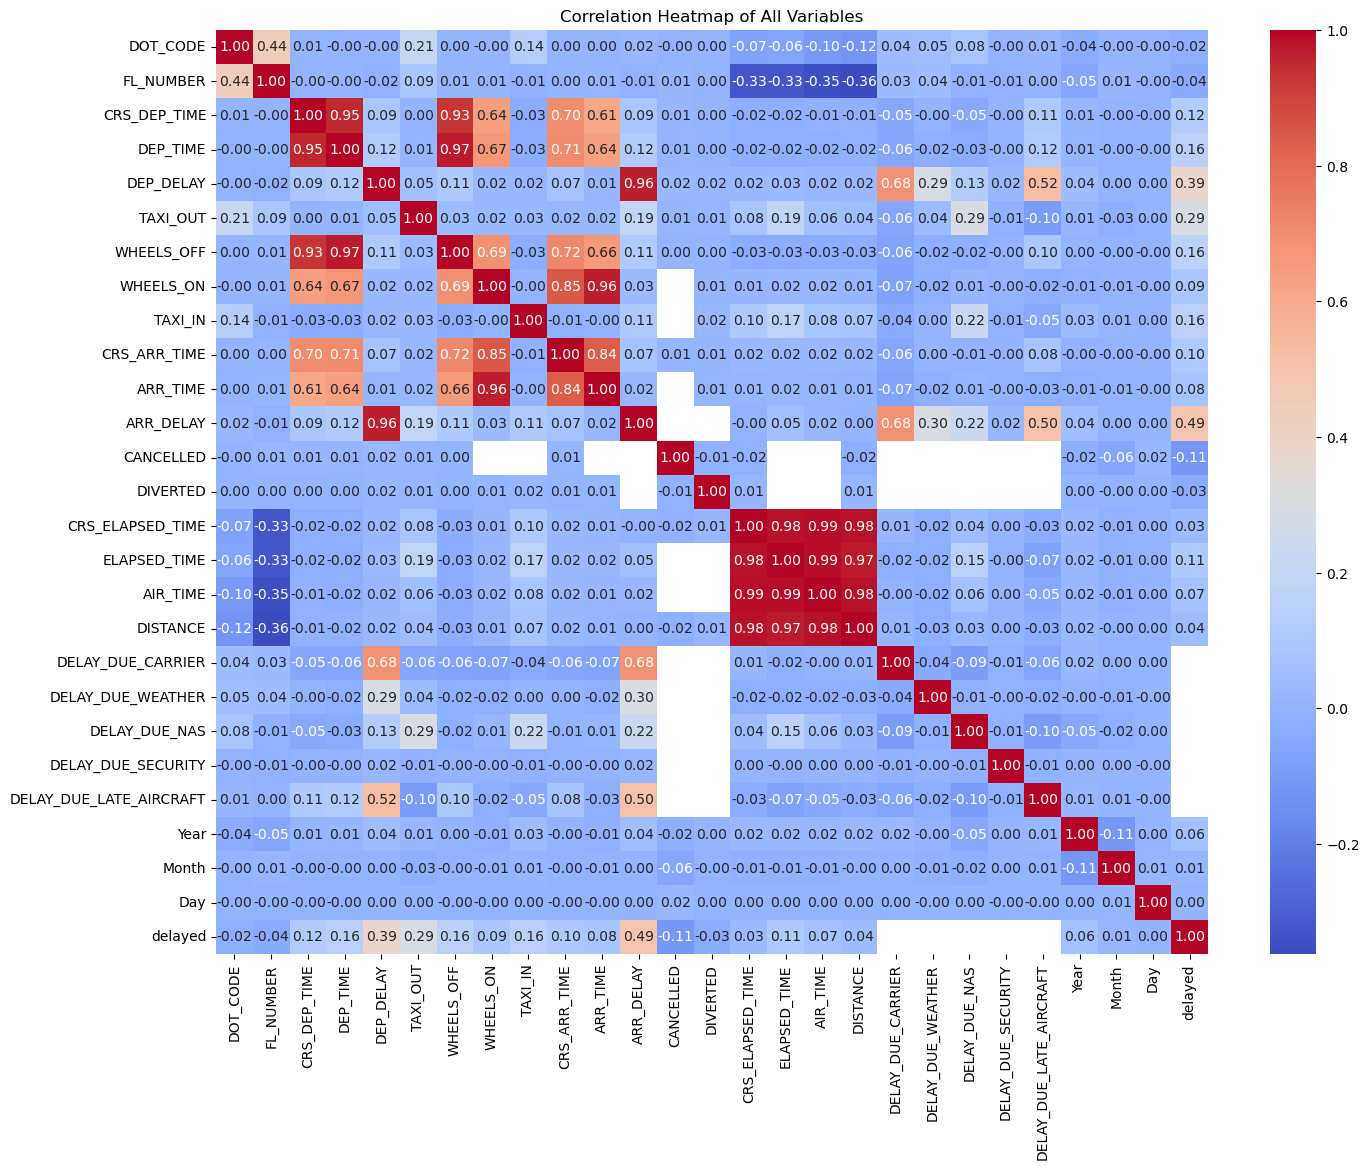

In [10]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(16, 12))  # Adjust size of the heatmap if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Variables')
plt.show()


### Conduct Linear Regression for feature select

In [11]:
#test_df = df.copy()

In [12]:
#test_df.shape

In [13]:
#new_df = test_df[['FL_DATE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'Year', 'Month', 'Day', 'delayed']]


In [14]:
#new_df.head()

In [15]:
# Factorize 'ORIGIN' column
#new_df['fact_ORIGIN'], _ = pd.factorize(new_df['ORIGIN'])

# Factorize 'DEST' column
#new_df['fact_DEST'], _ = pd.factorize(new_df['DEST'])

In [16]:
#new_df.info()

In [17]:
#new_df.drop(columns=['ORIGIN', 'DEST', 'ARR_DELAY'], inplace=True)

In [18]:
#new_df.info()

In [19]:
# Convert any columns to appropriate data types if needed
#new_df['delayed'] = pd.to_numeric(new_df['delayed'], errors='coerce')

# Drop any rows with missing values in ARR_DELAY
#new_df.dropna(subset=['delayed'], inplace=True)

# Prepare data for regression
# Replace '<independent_variable(s)>' with actual independent variable column name(s)
#X = new_df[['DOT_CODE', 'FL_NUMBER', 'DISTANCE', 'Year','Month', 'Day', 'fact_ORIGIN', 'fact_DEST']]
#y = new_df['delayed']

# Instantiate the linear regression model
#model = LinearRegression()

# Fit the model
#model.fit(X, y)

# Get the coefficients and corresponding column names
#coefficients = model.coef_
#column_names = X.columns

# Create a DataFrame to display the coefficients
#coefficients_df = pd.DataFrame({'Independent Variable': column_names, 'Coefficient': coefficients})

# Display the DataFrame
#print(coefficients_df)

### Building Random Forest Model to predict probability of a flight delay

In [20]:
testing_df = df.copy()
testing_df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Year,Month,Day,delayed
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065.0,NaN,NaN,NaN,NaN,NaN,2019,1,9,0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1399.0,NaN,NaN,NaN,NaN,NaN,2022,11,19,0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680.0,NaN,NaN,NaN,NaN,NaN,2022,7,22,0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1589.0,0.0,0.0,24.0,0.0,0.0,2023,3,6,1
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,985.0,NaN,NaN,NaN,NaN,NaN,2020,2,23,0


In [21]:
#only keep year, month, day, and ARR_DELAY, ORIGIN, DEST as they seem the most important variables
sample_df = testing_df[['DOT_CODE', 'ORIGIN', 'DEST', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'Year', 'Month', 'Day']]
sample_df.head()


,DOT_CODE,ORIGIN,DEST,ARR_DELAY,AIR_TIME,DISTANCE,Year,Month,Day
0,19977,FLL,EWR,-14.0,153.0,1065.0,2019,1,9
1,19790,MSP,SEA,-5.0,189.0,1399.0,2022,11,19
2,19977,DEN,MSP,0.0,87.0,680.0,2022,7,22
3,19790,MSP,SFO,24.0,249.0,1589.0,2023,3,6
4,20416,MCO,DFW,-1.0,153.0,985.0,2020,2,23


In [22]:
#check for the null values 
sample_df[sample_df.isnull().values.any(axis=1)].head()


,DOT_CODE,ORIGIN,DEST,ARR_DELAY,AIR_TIME,DISTANCE,Year,Month,Day
14,19393,SJC,LAX,NaN,NaN,308.0,2020,4,7
45,20452,ORD,DCA,NaN,NaN,612.0,2022,1,2
80,19393,BNA,ATL,NaN,NaN,214.0,2020,4,20
191,19930,IAD,LAX,NaN,NaN,2288.0,2021,12,31
236,19393,LAS,HOU,NaN,NaN,1235.0,2020,4,14


In [23]:
#check data structure 
sample_df.info(), sample_df.shape, sample_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   DOT_CODE   int64  
 1   ORIGIN     object 
 2   DEST       object 
 3   ARR_DELAY  float64
 4   AIR_TIME   float64
 5   DISTANCE   float64
 6   Year       int64  
 7   Month      int64  
 8   Day        int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 206.0+ MB


(None,
 (3000000, 9),
 DOT_CODE         0
 ORIGIN           0
 DEST             0
 ARR_DELAY    86198
 AIR_TIME     86198
 DISTANCE         0
 Year             0
 Month            0
 Day              0
 dtype: int64)

In [24]:
#remove any rows with null values 
sample_df = sample_df.dropna(subset=['ARR_DELAY', 'AIR_TIME'])

In [25]:
#check data structure 
sample_df.info(), sample_df.shape, sample_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913802 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   DOT_CODE   int64  
 1   ORIGIN     object 
 2   DEST       object 
 3   ARR_DELAY  float64
 4   AIR_TIME   float64
 5   DISTANCE   float64
 6   Year       int64  
 7   Month      int64  
 8   Day        int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 222.3+ MB


(None,
 (2913802, 9),
 DOT_CODE     0
 ORIGIN       0
 DEST         0
 ARR_DELAY    0
 AIR_TIME     0
 DISTANCE     0
 Year         0
 Month        0
 Day          0
 dtype: int64)

In [26]:
# Now use the following statements to generate indicator columns from the ORIGIN and DEST columns, 
# while dropping the ORIGIN and DEST columns
#this prepares the data for training 
sample_df = pd.get_dummies(sample_df, columns=['ORIGIN', 'DEST'])
sample_df.head()

,DOT_CODE,ARR_DELAY,AIR_TIME,DISTANCE,Year,Month,Day,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,...,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YKM,DEST_YUM
0,19977,-14.0,153.0,1065.0,2019,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19790,-5.0,189.0,1399.0,2022,11,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19977,0.0,87.0,680.0,2022,7,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19790,24.0,249.0,1589.0,2023,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20416,-1.0,153.0,985.0,2020,2,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#split the data 
train_x, test_x, train_y, test_y = train_test_split(sample_df.drop('ARR_DELAY', axis=1), sample_df['ARR_DELAY'], test_size=0.2, random_state=42)

In [28]:
#check the split count and percentages 
train_x.shape, test_x.shape

((2331041, 766), (582761, 766))

**PROBLEM**: I tried building this Random Forest model but it is uses 2331041 rows x 766 columns to train the data. Which is substantial. I'm sure there is a way to go about it, but I have no expericne with training this much data. Yusheng offered to take a look at this. 

In [ ]:
# Your model will be a binary classification model that predicts whether a flight will arrive on-time or late 
# ("binary" because there are only two possible outputs).
# Initialize and configure the progress bar
num_estimators = 100  # Adjust this based on your RandomForestClassifier parameters
tqdm_bar = tqdm(total=num_estimators, desc="Training", position=0)

# Create the model
model = RandomForestClassifier(n_estimators=num_estimators, random_state=13)

# Define a custom callback function to update the progress bar
def custom_callback(estimator, *args):
    tqdm_bar.update(1)

# Replace the default estimator callback with our custom callback
setattr(model, 'n_estimators_', custom_callback)

# Fit the model
model.fit(train_x, train_y)

# Close the progress bar
tqdm_bar.close()

Training:   0%|                                     | 0/2331041 [00:24<?, ?it/s]


# SEPERATE SECTION: IGNORE ANYTHING BELOW THIS FOR NOW

In [ ]:
#remove columns 
#remove_cols_df = df.drop(columns=['FL_DATE','CANCELLATION_CODE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'])
#remove_cols_df.head()

In [ ]:
#test_df = remove_cols_df[remove_cols_df['CANCELLED'] == 1.0]
#test_df.head()

This shows cancelled flights still end up showing average delays. So we only need to consider the "ARR_DELAY" column. Remove any nulls in "ARR_DELAY".

In [ ]:
#clean_df = remove_cols_df.dropna(subset=['ARR_DELAY'])

In [ ]:
#clean_df.isnull().sum()

The dataset is now clean. 

In [ ]:
#clean_df.info()

In [ ]:
#clean_df["DelayStatus"] = clean_df['ARR_DELAY'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
#clean_df.head(15)

# Step 1b: Visualization

Number of flights per month

In [ ]:
# Grouping the DataFrame by month and counting the number of flights in each month
#flights_per_month = clean_df.groupby('Month').size()

# Plotting the number of flights per month
#plt.figure(figsize=(10, 6))
#flights_per_month.plot(kind='bar', color='skyblue')
#plt.title('Number of Flights per Month')
#plt.xlabel('Month')
#plt.ylabel('Number of Flights')
#plt.xticks(rotation=0)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show()

For the most part there is an even distribution of flights for each month, aside from a slight drop off in the winter months. 

Market share of airline carriers in the data.

In [ ]:
# Calculate the number of flights operated by each airline
#airline_counts = clean_df['AIRLINE_CODE'].value_counts()

# Calculate the market share percentage for each airline
#market_share = airline_counts / airline_counts.sum() * 100

# Plotting the market share of each airline using a bar chart
#plt.figure(figsize=(12, 6))
#market_share.sort_values().plot(kind='barh', color='skyblue')
#plt.title('Market Share of Airlines')
#plt.xlabel('Market Share (%)')
#plt.ylabel('Airline')
#plt.grid(axis='x', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show()

Top 5 leading airlines are WN (Southwest), DL (Delta), AA (American Airlines), OO (Skywest), UA (United Airlines). 

Visualize statistical numbers of delay grouped by airlines. This will help us with identifying if a model is accurate later.

In [ ]:
# Grouping the DataFrame by "AIRLINE_CODE" and describing "ARR_DELAY"
#arr_delay_stats = df.groupby('AIRLINE_CODE')['ARR_DELAY'].describe()
#arr_delay_stats

In [ ]:
#How many flights were delayed (1) vs. not delayed (0)
#clean_df['DelayStatus'].value_counts().to_frame()

In [ ]:
#clean_df.info()

### Feature Selection

We will select the following features for our model building purposes from the original "clean_df" dataframe. Year, Month, Day, AIRLINE_CODE, ORIGIN, DEST, DelayStatus.

In [ ]:
#selected_columns = ['Year', 'Month', 'Day', 'AIRLINE_CODE', 'ORIGIN', 'DEST', 'DelayStatus']

#final_df = clean_df.loc[:, selected_columns]
#final_df.head()

In [ ]:
#final_df.shape

In [ ]:
#final_df.info()

# Step 2: Model Building

We will start off by using a regression model. 

### Testing with Logistic Regression

In [ ]:
# Data Preprocessing
#label_encoder = LabelEncoder()
#final_df['AIRLINE_CODE'] = label_encoder.fit_transform(final_df['AIRLINE_CODE'])
#final_df['ORIGIN'] = label_encoder.fit_transform(final_df['ORIGIN'])
#final_df['DEST'] = label_encoder.fit_transform(final_df['DEST'])

#X = final_df[['Year', 'Month', 'Day', 'AIRLINE_CODE', 'ORIGIN', 'DEST']]
#y = final_df['DelayStatus']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Selection
#model = LogisticRegression()

In [ ]:
# Model Training
#model.fit(X_train, y_train)

In [ ]:
# Model Evaluation
#y_pred = model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

#Accuracy: 0.6643066368545596

In [ ]:
#from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
#grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

# Use the best model
#best_model = grid_search.best_estimator_

# Model Evaluation
#y_pred = best_model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)


#Best Hyperparameters: {'C': 0.001}
#Accuracy: 0.6643066368545596